<a href="https://colab.research.google.com/github/ShrutiDiwan1403/Spotify_Hit_Predictor/blob/main/Spotify_hit_predictor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Uploading the csv files using pandas and reading them.*

In [1]:
import pandas as pd 
import io

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Spotify_Final_Dataset.xlsx to Spotify_Final_Dataset.xlsx


In [3]:
spotify_data = pd.read_excel(io.BytesIO(uploaded['Spotify_Final_Dataset.xlsx']))

In [4]:
spotify_data.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,Decade,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,2000,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,2000,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,2000,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,2000,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,2000,1


In [5]:
from google.colab import files
uploaded_1 = files.upload()

Saving music_genre.csv to music_genre.csv


*Loading all the libraries before beginning the task*

In [6]:
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

*This a balanced dataset therefore therefore there is no need for changes*

In [7]:
spotify_data.target.value_counts()

1    20553
0    20553
Name: target, dtype: int64

*Checking NA values*

In [8]:
spotify_data.isna().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
Decade              0
target              0
dtype: int64

In [9]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

*Dropping the categorical variable before find the correlation between variables*

In [10]:
spotify_data.drop(["track","artist","uri"],axis=1,inplace=True)

In [11]:
spotify_data.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,Decade,target
0,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,2000,1
1,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,2000,1
2,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,2000,0
3,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,2000,0
4,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,2000,1


***Normalizing the certain attributes for checking correlation between certain features with Min-Max Feature Scaling using scikit-learn.***

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(spotify_data)
scaled = scaler.transform(spotify_data)
scaled_df = pd.DataFrame(scaled, columns=spotify_data.columns)

In [13]:
scaled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,Decade,target
0,0.585020,0.470867,0.363636,0.792177,1.0,0.030104,0.369478,0.000000,0.148073,0.534137,0.551153,0.043691,0.8,0.071288,0.076923,0.8,1.0
1,0.712551,0.853963,0.909091,0.826009,0.0,0.190625,0.018574,0.000000,0.136917,0.690763,0.385166,0.054733,0.8,0.095828,0.059172,0.8,1.0
2,0.163968,0.835959,0.818182,0.872578,1.0,0.049271,0.000111,0.004570,0.163286,0.301205,0.360214,0.077911,0.8,0.150812,0.076923,0.8,0.0
3,0.190283,0.993998,0.363636,0.858690,1.0,0.172917,0.000007,0.078400,0.181542,0.334337,0.614854,0.057881,0.8,0.135267,0.053254,0.8,0.0
4,0.637652,0.763941,0.181818,0.847218,1.0,0.028646,0.364458,0.000000,0.113590,0.633534,0.464322,0.042982,0.8,0.052227,0.059172,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41101,0.448381,0.588897,0.636364,0.776799,1.0,0.040833,0.554217,0.000000,0.129817,0.966867,0.403445,0.088854,0.8,0.072975,0.136095,0.4,0.0
41102,0.210526,0.749937,0.818182,0.685095,1.0,0.112500,0.000135,0.000002,0.049797,0.395582,0.345729,0.033612,0.8,0.054753,0.047337,0.4,0.0
41103,0.747976,0.728932,0.363636,0.746438,0.0,0.059583,0.250000,0.007680,0.056795,0.887550,0.428041,0.086758,0.8,0.072296,0.076923,0.4,1.0
41104,0.758097,0.625906,0.000000,0.694888,1.0,0.040938,0.011546,0.567000,0.043408,0.773092,0.590520,0.084467,0.8,0.063982,0.106509,0.4,1.0


In [14]:
unscaled_inputs = spotify_data.iloc[:,0:-1]
target = spotify_data.iloc[:,[-1]]

***Split The Dataset into Train,Validation and TestSplit The Dataset into Train,Validation and Test***

In [15]:
from sklearn import preprocessing
scaled_inputs = preprocessing.scale(unscaled_inputs)

In [16]:
samples_count = scaled_inputs.shape[0]
samples_count

41106

In [17]:
train_samples_count = int(0.8*samples_count)
train_samples_count

32884

In [18]:
validation_samples_count = int(0.1*samples_count)
validation_samples_count

4110

In [19]:
test_samples_count = samples_count - train_samples_count - validation_samples_count
test_samples_count

4112

In [20]:
# training part:
train_inputs = scaled_inputs[:train_samples_count]
train_targets = target[:train_samples_count]

In [21]:
# validation part:
validation_inputs = scaled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = target[train_samples_count:train_samples_count+validation_samples_count]

In [22]:
# test part:
test_inputs = scaled_inputs[train_samples_count+validation_samples_count:]
test_targets = target[train_samples_count+validation_samples_count:]

In [23]:
# Print the number of targets that are 1s, the total number of samples, and the proportion for training, validation, and test.
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

target    16439
dtype: int64 32884 target    0.499909
dtype: float64
target    2060
dtype: int64 4110 target    0.501217
dtype: float64
target    2054
dtype: int64 4112 target    0.499514
dtype: float64


Saving all the dataset in .npz format for fast working

In [24]:
# Save the three datasets in *.npz.
# We will see that it is extremely valuable to name them in such a coherent way!

np.savez('Spotify_data_train', inputs=train_inputs, targets=train_targets)
np.savez('Spotify_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('Spotify_data_test', inputs=test_inputs, targets=test_targets)

In [25]:
import sys
npz = np.load('Spotify_data_train.npz')

# we extract the inputs using the keyword under which we saved them
train_inputs = npz['inputs'].astype(np.float64)

# targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)
train_targets = npz['targets'].astype(np.int32)

In [26]:
# we load the validation data in the temporary variable
npz = np.load('Spotify_data_validation.npz')

# we can load the inputs and the targets in the same line
validation_inputs, validation_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.int32)

In [27]:
# we load the test data in the temporary variable
npz = np.load('Spotify_data_test.npz')

# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(np.float64), npz['targets'].astype(np.int32)

***Model Building***

In [28]:
# Set the input and output sizes

input_size = 15 # count of features
output_size = 2 # count of targets
# Use same hidden layer size for both hidden layers. Not a necessity.
hidden_layer_size = 50 # counts of neurons
    


# define how the model will look like
model = tf.keras.Sequential([
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 3nd hidden layer
    # the final layer is no different, we just make sure to activate it with softmax
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

In [29]:
# we define the optimizer we'd like to use, the loss function,and the metrics we are interested in obtaining at each iteration.
# the learning_rate is taken 0.01
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

***Training the model***

In [30]:
# set the batch size
batch_size = 300
#sincr 20 epch creates high error ouput. The number f epoch is checked with 6 and 10
# set a maximum number of training epochs
max_epochs = 10

# fit the model
# note that this time the train, validation and test data are not iterable
history = model.fit(  train_inputs, # train inputs
                      train_targets, # train targets
                      batch_size=batch_size, # batch size
                      epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't begin)
                      # callbacks are functions called by a task when a task is completed
                      # task here is to check if val_loss is increasing
                    
                      validation_data=(validation_inputs, validation_targets), # validation data
                      verbose = 2 # making sure we get enough information about the training process
          )  

Epoch 1/10
110/110 - 1s - loss: 0.5233 - accuracy: 0.7410 - val_loss: 0.5250 - val_accuracy: 0.7457 - 1s/epoch - 12ms/step
Epoch 2/10
110/110 - 0s - loss: 0.4676 - accuracy: 0.7755 - val_loss: 0.5036 - val_accuracy: 0.7606 - 296ms/epoch - 3ms/step
Epoch 3/10
110/110 - 0s - loss: 0.4515 - accuracy: 0.7863 - val_loss: 0.5000 - val_accuracy: 0.7633 - 302ms/epoch - 3ms/step
Epoch 4/10
110/110 - 0s - loss: 0.4410 - accuracy: 0.7907 - val_loss: 0.4903 - val_accuracy: 0.7686 - 292ms/epoch - 3ms/step
Epoch 5/10
110/110 - 0s - loss: 0.4362 - accuracy: 0.7949 - val_loss: 0.4926 - val_accuracy: 0.7710 - 298ms/epoch - 3ms/step
Epoch 6/10
110/110 - 0s - loss: 0.4301 - accuracy: 0.7994 - val_loss: 0.4909 - val_accuracy: 0.7684 - 289ms/epoch - 3ms/step
Epoch 7/10
110/110 - 0s - loss: 0.4239 - accuracy: 0.8025 - val_loss: 0.4914 - val_accuracy: 0.7691 - 315ms/epoch - 3ms/step
Epoch 8/10
110/110 - 0s - loss: 0.4218 - accuracy: 0.8036 - val_loss: 0.4926 - val_accuracy: 0.7676 - 297ms/epoch - 3ms/step
Ep

***Visualizing Neural Network loss information***

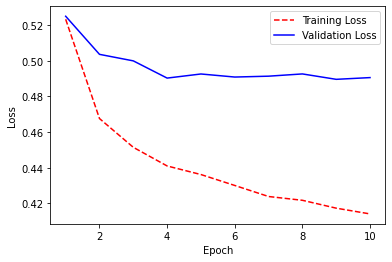

In [31]:
# Get training and test loss histories
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

***Testing the model***

In [32]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
print('\nTest loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

129/129 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7821

Test loss: 0.48. Test accuracy: 78.21%


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore')

In [34]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop high-cardinality categorical columns
    df = df.drop(['track', 'artist', 'uri'], axis=1)
    
    # Split df into X and y
    y = df['target']
    X = df.drop('target', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

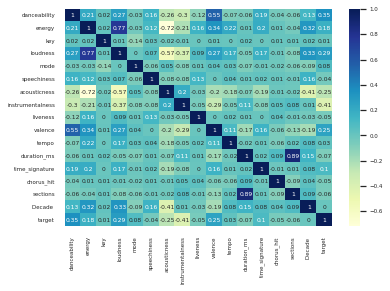

<Figure size 30000x30000 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 30000x30000 with 0 Axes>

In [35]:
#Creating correlogram for analysis

import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

corr_matrix = scaled_df.corr().round(2)
sns.set(font_scale= 0.5)
sns.heatmap(corr_matrix, cmap="YlGnBu", annot = True)
plt.show()
plt.savefig("correlogram.png")
plt.figure(figsize=(100, 100), dpi=300)



In [36]:
from google.colab import files
plt.savefig("correlogram.png")
files.download("correlogram.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>